輸入立委臉書粉專內容及選舉政見資料

In [18]:
import pandas as pd
fb = pd.read_csv('nysu_10902_2019立委_research.csv')
politics = pd.read_csv('9th_legislator_promise.csv')

以台北市內湖區、南港區立委參選人李彥秀為例，依照月份來統計數值資料的變化

In [19]:
lee = fb[fb.page_name == "李彥秀"]#將李彥秀臉書資料叫出
lee.head(1)

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
18632,606321216096498_2117673888294549,606321216096498,李彥秀,政治人物,#家暴不是家務事 \n\n這幾天一個家暴個案的新聞連續幾天佔據媒體版面，不但令人傷心也令人憤...,NaN,photo,https://www.facebook.com/606321216096498/posts...,2019-01-15T09:10:24+0000,2019-01-15T17:10:24,...,NaN,NaN,425,0,0,0,0,0,20,9


In [20]:
lee[lee.created_time_taipei == min(lee.created_time_taipei)]#最早一則貼文

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
18644,606321216096498_2099896366738968,606321216096498,李彥秀,政治人物,目前為了查核新生有沒有依規定時程接種疫苗，幼兒園教保員、國小教師需要花費許多心力要求家長提供...,NaN,photo,https://www.facebook.com/606321216096498/posts...,2019-01-03T04:00:59+0000,2019-01-03T12:00:59,...,李彥秀貼文的相片,NaN,124,0,0,0,0,0,7,3


In [21]:
lee[lee.created_time_taipei == max(lee.created_time_taipei)]#最後一則貼文

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
19094,606321216096498_2729942367067695,606321216096498,李彥秀,政治人物,NaN,李彥秀更新了封面相片。,photo,https://www.facebook.com/606321216096498/posts...,2019-12-26T05:43:21+0000,2019-12-26T13:43:21,...,李彥秀的封面相片,NaN,105,0,0,0,0,0,4,1


In [22]:
lee['new_date'] = pd.to_datetime(lee['created_time_taipei']).dt.date
lee['month_year'] = pd.to_datetime(lee['new_date']).dt.to_period('M')
lee.head(1)
#轉換時間格式

<ipython-input-22-b47fbbe37fe4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lee['new_date'] = pd.to_datetime(lee['created_time_taipei']).dt.date
<ipython-input-22-b47fbbe37fe4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lee['month_year'] = pd.to_datetime(lee['new_date']).dt.to_period('M')


,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
18632,606321216096498_2117673888294549,606321216096498,李彥秀,政治人物,#家暴不是家務事 \n\n這幾天一個家暴個案的新聞連續幾天佔據媒體版面，不但令人傷心也令人憤...,NaN,photo,https://www.facebook.com/606321216096498/posts...,2019-01-15T09:10:24+0000,2019-01-15T17:10:24,...,425,0,0,0,0,0,20,9,2019-01-15,2019-01


In [23]:
results = lee.groupby('month_year').sum()
results
#統計每個月份的讚數、留言、分享

,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
month_year,,,,,,,,,
2019-01,18189636482894940,12287,0,0,0,0,0,578,351
2019-02,26071812292149392,16679,0,0,0,0,0,1294,591
2019-03,22433884995570416,23519,0,0,0,0,0,2079,1097
2019-04,22433884995570416,27130,0,0,0,0,0,1826,570
2019-05,23040206211666912,48464,0,0,0,0,0,4173,871
2019-06,20008600131184432,60621,0,0,0,0,0,2896,1069
2019-07,23040206211666912,39525,0,0,0,0,0,2322,998
2019-08,26071812292149392,77531,0,0,0,0,0,2940,1682
2019-09,24252848643859904,73674,0,0,0,0,0,2603,994


In [24]:
results.index.name = 'newhead'
results.reset_index(inplace=True)
results
#回復原本的排列

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
0,2019-01,18189636482894940,12287,0,0,0,0,0,578,351
1,2019-02,26071812292149392,16679,0,0,0,0,0,1294,591
2,2019-03,22433884995570416,23519,0,0,0,0,0,2079,1097
3,2019-04,22433884995570416,27130,0,0,0,0,0,1826,570
4,2019-05,23040206211666912,48464,0,0,0,0,0,4173,871
5,2019-06,20008600131184432,60621,0,0,0,0,0,2896,1069
6,2019-07,23040206211666912,39525,0,0,0,0,0,2322,998
7,2019-08,26071812292149392,77531,0,0,0,0,0,2940,1682
8,2019-09,24252848643859904,73674,0,0,0,0,0,2603,994
9,2019-10,36379272965789824,140541,0,0,0,0,0,4918,2105


可以看到，讚數最多月份的前三名為2019.12月、2019.10月、2019.11月，評論數最多的月份為2019.12月、2019.10月、2019.5月，而分享次數最多的月份為2019.12月、2019.10月、2019.11月。

以下將針對有重複的月份作分析，查看2019.10月、2019.11月、2019.12月這幾個月份的貼文有什麼值得研究的地方。

In [25]:
results['newhead'].map(str)#將newhead那欄中所有資料轉為字串格式

0     2019-01
1     2019-02
2     2019-03
3     2019-04
4     2019-05
5     2019-06
6     2019-07
7     2019-08
8     2019-09
9     2019-10
10    2019-11
11    2019-12
Name: newhead, dtype: object

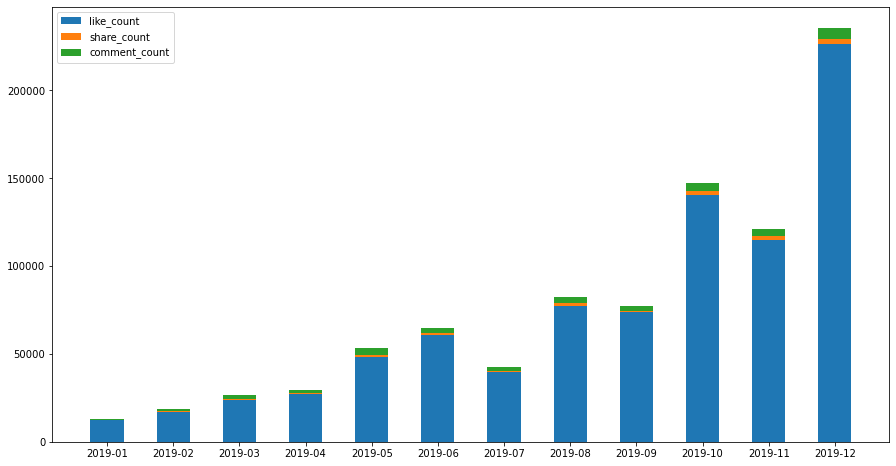

In [26]:
import matplotlib.pyplot as plt

labels = results['newhead'].map(str)
width = 0.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.bar(labels, results['like_count'], width, label='like_count')
ax.bar(labels, results['share_count'], width, label='share_count', bottom=results['like_count'])
ax.bar(labels, results['comment_count'], width, label='comment_count', bottom=results['share_count']+results['like_count'])

ax.legend()

plt.show()

第十屆立委於2020年1月11號舉行，可以看到選前一個月2019.12月的貼文讚數、分享與評論數都高，可能是因為隔年1月就要選舉導致。除了選前外，次高的月份為2019.10月，第三高的則是201911月。

首先對12月的貼文做分析

In [27]:
December = lee[lee.month_year == "2019-12"]

In [28]:
results_december= December.groupby('new_date').sum()
results_december

,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
new_date,,,,,,,,,
2019-12-01,1818963648289494,11143,0,0,0,0,0,195,92
2019-12-02,1212642432192996,6644,0,0,0,0,0,150,112
2019-12-03,1212642432192996,6507,0,0,0,0,0,147,50
2019-12-04,606321216096498,3814,0,0,0,0,0,160,114
2019-12-05,1212642432192996,6945,0,0,0,0,0,193,113
2019-12-06,1212642432192996,3496,0,0,0,0,0,65,89
2019-12-07,606321216096498,3112,0,0,0,0,0,117,31
2019-12-08,606321216096498,6352,0,0,0,0,0,100,49
2019-12-09,606321216096498,2034,0,0,0,0,0,56,55


In [29]:
results_december.index.name = 'newhead'
results_december.reset_index(inplace=True)
results_december

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
0,2019-12-01,1818963648289494,11143,0,0,0,0,0,195,92
1,2019-12-02,1212642432192996,6644,0,0,0,0,0,150,112
2,2019-12-03,1212642432192996,6507,0,0,0,0,0,147,50
3,2019-12-04,606321216096498,3814,0,0,0,0,0,160,114
4,2019-12-05,1212642432192996,6945,0,0,0,0,0,193,113
5,2019-12-06,1212642432192996,3496,0,0,0,0,0,65,89
6,2019-12-07,606321216096498,3112,0,0,0,0,0,117,31
7,2019-12-08,606321216096498,6352,0,0,0,0,0,100,49
8,2019-12-09,606321216096498,2034,0,0,0,0,0,56,55
9,2019-12-10,1212642432192996,7506,0,0,0,0,0,185,53


No handles with labels found to put in legend.


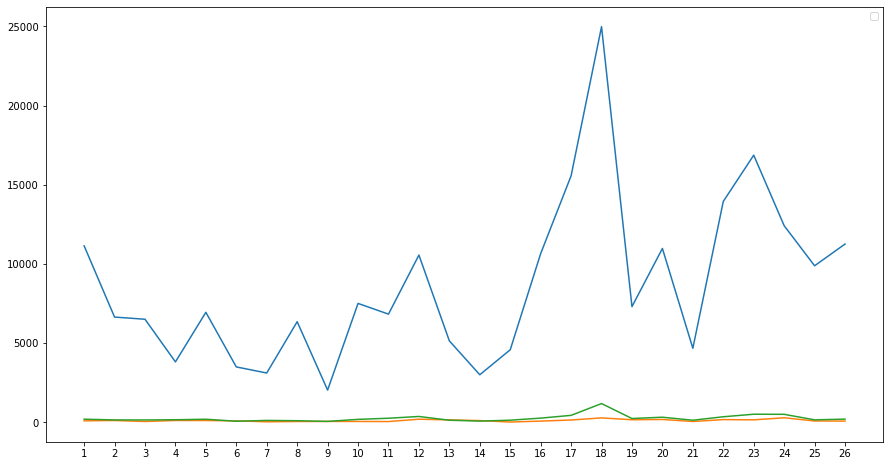

In [30]:
labels_december = [str(i) for i in range(1,27)]

fig_december, ax = plt.subplots()
fig_december.set_size_inches(15, 8)

ax.plot(labels_december, results_december['like_count'])
ax.plot(labels_december, results_december['share_count'])
ax.plot(labels_december, results_december['comment_count'])

ax.legend()

plt.show()

可以看到2019年12月18日的文章有非常高的熱度，來看看當天發生了什麼事情。

In [32]:
lee['new_date']=lee['new_date'].map(str)
lee[lee['new_date'] == "2019-12-18"] 
#查看當天的貼文

<ipython-input-32-134ffebca219>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lee['new_date']=lee['new_date'].map(str)


,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
19118,606321216096498_2713850055343593,606321216096498,李彥秀,政治人物,生日快樂！ 這次是祝我自己。\n\n今天除了是選舉號次抽籤日，也是我的生日。長期陪伴我的志工...,NaN,photo,https://www.facebook.com/606321216096498/posts...,2019-12-18T14:16:59+0000,2019-12-18T22:16:59,...,5681,0,0,0,0,0,468,38,2019-12-18,2019-12
19119,606321216096498_2713450125383586,606321216096498,李彥秀,政治人物,好久沒有站在車子上跟大家問候！\n是不是有點生疏了！？\n\n#助理說就跟騎腳車學會就是自己...,NaN,photo,https://www.facebook.com/606321216096498/posts...,2019-12-18T09:59:45+0000,2019-12-18T17:59:45,...,6224,0,0,0,0,0,224,49,2019-12-18,2019-12
19120,606321216096498_2713312735397325,606321216096498,李彥秀,政治人物,港湖團結真有力，國會戰將繼續拚！ 2號李彥秀造勢大會！\n\n立法院需要專業的問政，港湖需要...,NaN,photo,https://www.facebook.com/606321216096498/posts...,2019-12-18T08:26:44+0000,2019-12-18T16:26:44,...,3559,0,0,0,0,0,146,48,2019-12-18,2019-12
19121,606321216096498_2712808475447751,606321216096498,李彥秀,政治人物,二號！李彥秀！\n\n#好立委再連任 #選二號李彥秀\n#抽完籤就立刻電話拜票的節奏,NaN,photo,https://www.facebook.com/606321216096498/posts...,2019-12-18T01:44:35+0000,2019-12-18T09:44:35,...,9518,0,0,0,0,0,344,143,2019-12-18,2019-12


In [71]:
temp_1 = lee[lee['new_date'] == "2019-12-18"]
temp_1[temp_1.like_count == max(temp_1.like_count)]
#得到讚數最多的貼文

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
19121,606321216096498_2712808475447751,606321216096498,李彥秀,政治人物,二號！李彥秀！\n\n#好立委再連任 #選二號李彥秀\n#抽完籤就立刻電話拜票的節奏,NaN,photo,https://www.facebook.com/606321216096498/posts/2712808475447751/,2019-12-18T01:44:35+0000,2019-12-18T09:44:35,...,9518,0,0,0,0,0,344,143,2019-12-18,2019-12


可以看到編號19121的貼文得到的讚數最多，以下將看看這篇貼文的內容如何。

In [34]:
pd.set_option('display.max_colwidth', None)
showlink = lee[lee.new_date == "2019-12-18"].permalink.to_string()
print(showlink)
#貼出當天貼文的所有連結

19118    https://www.facebook.com/606321216096498/posts/2713850055343593/
19119    https://www.facebook.com/606321216096498/posts/2713450125383586/
19120    https://www.facebook.com/606321216096498/posts/2713312735397325/
19121    https://www.facebook.com/606321216096498/posts/2712808475447751/


經臉書連結的貼文確認，19121的貼文內容是李彥秀委員剛抽完選舉號碼的貼文。

分析完12月份的貼文，接著看看10月份的貼文為什麼會是次高的，且比11月的貼文熱度還高。

In [49]:
October = lee[lee.month_year == "2019-10"]

In [50]:
results_october= October.groupby('new_date').sum()
results_october

,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
new_date,,,,,,,,,
2019-10-01,1212642432192996,7921,0,0,0,0,0,201,96
2019-10-02,1818963648289494,5034,0,0,0,0,0,152,70
2019-10-03,1212642432192996,7028,0,0,0,0,0,128,72
2019-10-04,1212642432192996,1450,0,0,0,0,0,60,44
2019-10-05,2425284864385992,6867,0,0,0,0,0,116,52
2019-10-06,1818963648289494,4173,0,0,0,0,0,108,52
2019-10-07,1212642432192996,4512,0,0,0,0,0,161,49
2019-10-08,606321216096498,2205,0,0,0,0,0,105,51
2019-10-09,1818963648289494,7337,0,0,0,0,0,182,96


No handles with labels found to put in legend.


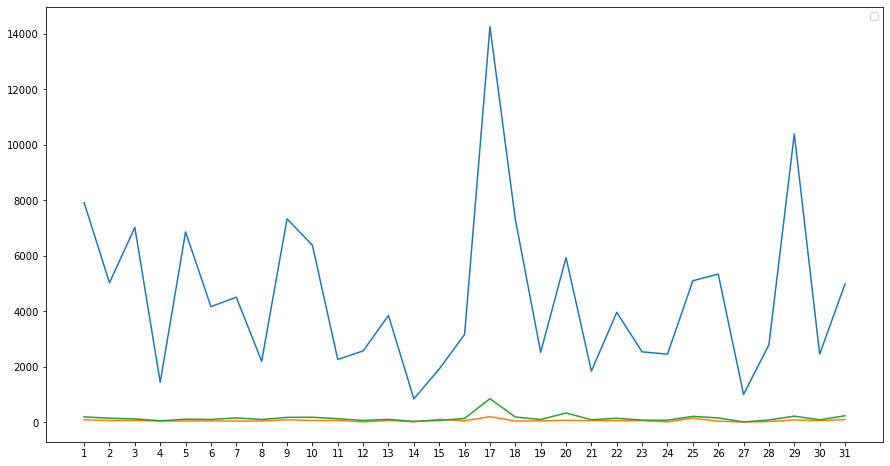

In [67]:
labels_october = [str(i) for i in range(1,32)]

fig_october, ax = plt.subplots()
fig_october.set_size_inches(15, 8)

ax.plot(labels_october, results_october['like_count'])
ax.plot(labels_october, results_october['share_count'])
ax.plot(labels_october, results_october['comment_count'])

ax.legend()

plt.show()

In [68]:
lee[lee['new_date'] == "2019-10-17"]

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
19017,606321216096498_2577847952277138,606321216096498,李彥秀,政治人物,你有看過候選人自己拿舉牌嗎？\n如果沒有，現在讓你看看！\n\n#路邊聊了起來,NaN,photo,https://www.facebook.com/606321216096498/posts/2577847952277138/,2019-10-17T08:56:01+0000,2019-10-17T16:56:01,...,11671,0,0,0,0,0,784,191,2019-10-17,2019-10
19018,606321216096498_2577462598982340,606321216096498,李彥秀,政治人物,今年十月真是秋高氣爽，正好適合出遊，今年要去哪裡玩呢？\n\n#早晚溫差跟飄雨還是要留意唷,NaN,photo,https://www.facebook.com/606321216096498/posts/2577462598982340/,2019-10-17T03:32:30+0000,2019-10-17T11:32:30,...,2592,0,0,0,0,0,71,16,2019-10-17,2019-10


In [72]:
temp_2 = lee[lee['new_date'] == "2019-10-17"]
temp_2[temp_2.like_count == max(temp_2.like_count)]
#得到讚數最多的貼文

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
19017,606321216096498_2577847952277138,606321216096498,李彥秀,政治人物,你有看過候選人自己拿舉牌嗎？\n如果沒有，現在讓你看看！\n\n#路邊聊了起來,NaN,photo,https://www.facebook.com/606321216096498/posts/2577847952277138/,2019-10-17T08:56:01+0000,2019-10-17T16:56:01,...,11671,0,0,0,0,0,784,191,2019-10-17,2019-10


可以看到19107這篇貼文是10月17日按讚數最高的貼文。

In [70]:
pd.set_option('display.max_colwidth', None)
showlink = lee[lee.new_date == "2019-10-17"].permalink.to_string()
print(showlink)

19017    https://www.facebook.com/606321216096498/posts/2577847952277138/
19018    https://www.facebook.com/606321216096498/posts/2577462598982340/


經查詢之後，19017這篇貼文的內容是李彥秀在路邊舉牌的貼文。

在經過分析之後，10月及12月的資料按讚數最高的貼文都是有關選舉的，接下來看看5月份的評論數為何是一年中第三高的

In [73]:
May = lee[lee.month_year == "2019-05"]

In [74]:
results_may= May.groupby('new_date').sum()
results_may

,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
new_date,,,,,,,,,
2019-05-01,606321216096498,856,0,0,0,0,0,77,39
2019-05-02,606321216096498,1215,0,0,0,0,0,105,8
2019-05-03,1212642432192996,715,0,0,0,0,0,78,7
2019-05-04,606321216096498,4721,0,0,0,0,0,115,39
2019-05-05,606321216096498,767,0,0,0,0,0,136,9
2019-05-06,606321216096498,390,0,0,0,0,0,17,7
2019-05-07,606321216096498,1571,0,0,0,0,0,105,20
2019-05-09,1212642432192996,4752,0,0,0,0,0,144,73
2019-05-10,606321216096498,514,0,0,0,0,0,50,11


可以看到5月評論數最高的是5月17日的貼文

In [75]:
lee[lee['new_date'] == "2019-05-17"]

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
18813,606321216096498_2300814626647140,606321216096498,李彥秀,政治人物,大家午安，快到月底了，大家報稅了嗎？是不是都想要拖到最後一刻？\n下星期週末（5/25、5/26）我們提供免費便民報稅服務，彥秀是您的好鄰居～歡迎需要幫忙的朋友！,NaN,photo,https://www.facebook.com/606321216096498/posts/2300814626647140/,2019-05-17T05:55:04+0000,2019-05-17T13:55:04,...,1325,0,0,0,0,0,692,32,2019-05-17,2019-05


In [76]:
pd.set_option('display.max_colwidth', None)
showlink = lee[lee.new_date == "2019-05-17"].permalink.to_string()
print(showlink)

18813    https://www.facebook.com/606321216096498/posts/2300814626647140/


可以看到內文是有關於選民服務的